<h1 align='center'> 영상처리프로그래밍 중간고사</h1>

<h3 align='center'> 담당교수 : 박섭형</h3>

<p style="text-align: right"> 2022.4.19.</p>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 아래에 자신의 이름, 학번, 학과(전공)을 적으세요.

  - 이름: 이은재
  - 학번: 20185158  
  - 학과(전공): 빅데이터
    
</div>

- 주의 사항
  - 시험 시간: 오후 3:00 ~ 오후 2:10
  - 시험 시간 동안에는 카메라를 켜서 자신의 모습이 화면에 나타나야 함
  - 오후 4:10에 줌을 종료하고 SmartLead에 .ipynb 파일을 업로드
    - 업로드 마감 시간: 오후 4:15
  - 파일 업로드 후에 자신의 답안지를 설명하는 개인 동영상 녹화 시작
     - 녹화할 때 Jupyter notebook 화면이 전체 화면에 나오고 설명하는 자신의 얼굴이 화면 모퉁이에 함께 녹화되어야 함
     - 문제 하나당 설명 시간이 3분을 넘지 않도록 주의
  - 동영상 파일을 SmartLead에 파일 업로드
    - 업로드 마감 시간: 오후 4:50
  - 주: 아래 두 파일을 별도로 업로드 함.
     - ipynb 파일 (마감 시간 오후 4:15)
     - 문제해설 녹화 동영상 (마감 시간 오후 4:50)


#### 채점 결과 


| 문제 | 문제 1 | 문제 2 | 문제 3 | 문제 4 | 문제 5 | 문제 6 | 합계 |
--|--|--|--|--|--|--|--
만점 | 10 | 10 | 30 | 20 | 20 | 10 | 100
득점 | | | | | |

## 'istanbul.jpg' 파일을 읽고, 다음 질문에 답을 하라.

### 문제 1.
이 영상 데이터를 표현하는 numpy ndarray에서 순서 영상 데이터가 차지하는 메모리의 크기가 몇 byte 인지 계산하는 프로그램을 작성하라.

**1 번 답**:

In [1]:
import cv2
import numpy as np

In [3]:
import sys

def info_array_byte(arr):
    print("size:", sys.getsizeof(arr), "byte")

img = cv2.imread("istanbul.jpg")
info_array_byte(img)

size: 72000136 byte


## 문제 2.
이 영상의 크기를 가로 1,200 화소, 세로 800 화소로 줄여서 같은 변수에 할당하라.

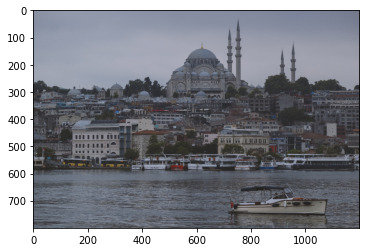

In [5]:
import matplotlib.pyplot as plt
img = cv2.resize(img, (1200,800))
plt.imshow(img[:,:,::-1])

### 문제 3.

'image' 라는 이름의 title을 가진 창을 만들고 이 창에 문제 1-2에서 만든 작은 영상을 표시하고,
마우스를 그 창 위에서 움직이면 반지름이 영상의 높이의 1/4인 흰색 원이 마우스를 따라 움직이는 프로그램을 작성하라. 단, 원의 중심은 마우스의 현재 위치가 되고, 키보드로 'q'를 입력하면 프로그램이 종료되어야 한다.

In [47]:
def drawCircleToImage(event, x, y, flags, param):
    global center, img_copy, img
    if event == cv2.EVENT_MOUSEMOVE:
        center = x,y

        img = cv2.circle(img, center, radius, white, cv2.LINE_4)
        cv2.imshow(winName, img)
        img = img_copy.copy()

img = cv2.imread("istanbul.jpg")
img = cv2.resize(img, (1200,800)) 
img_copy = img.copy()

white = [255,255,255]
winName = "image"
center = [0,0]
radius = img.shape[0] // 4
cv2.imshow(winName, img)
cv2.setMouseCallback(winName, drawCircleToImage)
while cv2.waitKey(0) != ord('q'):
    pass
cv2.destroyAllWindows()


### 문제 4.

문제 3에서 만든 프로그램에 다음 기능을 추가하라.

마우스를 따라서 움직이는 원의 내부에만 감마 변환을 적용한 영상을 표시하라.
단, 감마의 값은 0.5로 한다.

In [3]:
def gammaChanger(gamma):
    if(gamma == 0):
        return
    out = img.copy()
    out = ((out/255) ** (1/(gamma/10)))*255
    out = out.astype(np.uint8)
    return out

def drawCircleToImage(event, x, y, flags, param):
    global center, img_copy, img, gamma_idx
    if event == cv2.EVENT_MOUSEMOVE:
        center = x,y
        img = cv2.circle(img, center, radius, white, cv2.LINE_4)
        cv2.imshow(winName, img)
        img = img_copy.copy()
        
        x = np.arange(img.shape[0]).reshape(img.shape[0], 1) 
        y = np.arange(img.shape[1]).reshape(1, img.shape[1])
        gamma_idx = (x - center[1]) ** 2  + (y - center[0]) ** 2 < radius ** 2
        img[gamma_idx] = [0,0,0]
        cv2.imshow(winName, img)



img = cv2.imread("istanbul.jpg")
img = cv2.resize(img, (1200,800)) 
img_copy = img.copy()

white = [255,255,255]
winName = "image"
center = [0,0]
radius = img.shape[0] // 4

cv2.imshow(winName, img)
cv2.setMouseCallback(winName, drawCircleToImage)
while cv2.waitKey(0) != ord('q'):
    pass
cv2.destroyAllWindows()




### 문제 5.

문제 4에서 만든 프로그램에 다음 기능을 추가하라.

왼쪽 마우스를 클릭할 때마다 감마의 값은 0.1씩 감소하고, 오른쪽 마우스를 클릭할 때마다 감마의 값은 0.1씩 증가한다. 단, 감마의 범위는 0.1부터 2.0까지로 제한한다.

### 문제 6. 

문제 5에서 만든 프로그램에 다음 기능을 추가하라.

키보드로 'd'를 누르면 원의 반지름이 10씩 감소하고, 'f'를 누르면 원의 반지름이 10씩 증가한다. 단, 반지름의 범위는 50부터 영상의 높이의 1/2까지로 제한한다.

In [43]:
def gammaChanger(gamma):
    if(gamma == 0):
        return
    out = circle_gamma.copy()
    out = ((out/255) ** (1/(gamma/10)))*255
    out = out.astype(np.uint8)
    cv2.imshow("Forest", out)

def drawCircleToImage(event, x, y, flags, param):
    global center, img_copy, img, circle_gamma
    if event == cv2.EVENT_MOUSEMOVE:
        center = x,y
        img = cv2.circle(img, center, radius, white, cv2.LINE_4)
        cv2.imshow(winName, img)

        img = img_copy.copy()
        img_cropped = img[center[1]-radius:center[1]+radius+1, center[0]-radius:center[0]+radius+1].copy()
        x = np.arange(img_cropped.shape[0]).reshape(img_cropped.shape[0], 1) 
        y = np.arange(img_cropped.shape[1]).reshape(1, img_cropped.shape[1])
        gamma_idx = (x - center[0]) ** 2  + (y - center[1]) ** 2 > radius ** 2
        


img = cv2.imread("istanbul.jpg")
img = cv2.resize(img, (1200,800)) 
img_copy = img.copy()

white = [255,255,255]
winName = "image"
center = [0,0]
radius = img.shape[0] // 4

cv2.imshow(winName, img)
cv2.setMouseCallback(winName, drawCircleToImage)
while cv2.waitKey(0) != ord('q'):
    if cv2.waitKey(0) == ord('d') and radius >= 50:
        radius = radius-10
        img = cv2.circle(img, center, radius, white, cv2.LINE_4)
        cv2.imshow(winName, img)
        img = img_copy.copy()
    elif cv2.waitKey(0) == ord('f') and radius < img.shape[0] // 2:
        radius = radius+10
        img = cv2.circle(img, center, radius, white, cv2.LINE_4)
        cv2.imshow(winName, img)
        img = img_copy.copy()
    

    pass
cv2.destroyAllWindows()


